

# <font color='blue'>KNN Classification </font>

KNN classification is one of the simplest algorithms for Machine Learning, being a lazy algorithm, that is, no computation is performed in the dataset until a new data point is tested.

#### KNN Classification in Python - Setting A Problem For Multiclass Classification

We will make handwritten digit predictions in the mnist dataset. This is an example of multiclass classification, because our model will have to predict one out of 10 possible outputs for each record (digits 0 through 10).

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

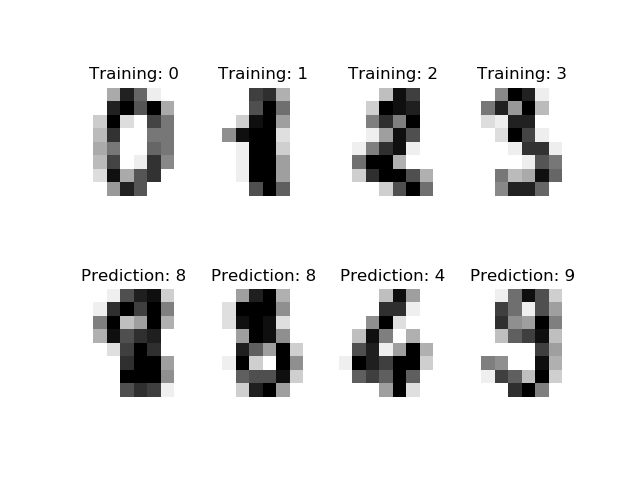

In [1]:
from IPython.display import Image
Image('imagens/digitos.png')

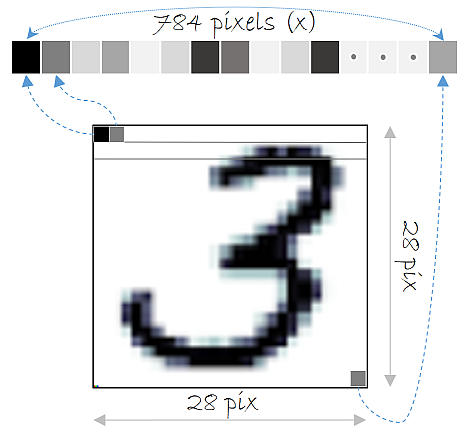

In [1]:
# Each pixel is a variable
from IPython.display import Image
Image('imagens/flatten.png')

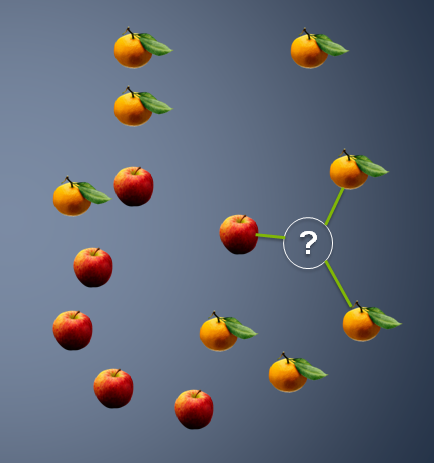

In [3]:
from IPython.display import Image
Image('imagens/frutas.png')

#### KNN Rating in Python - Loading and Exploring dataset

In [2]:
# Load packages
import numpy as np
from sklearn import datasets # Get dataset
from sklearn.metrics import confusion_matrix # Calculate confusion matrix
from sklearn.model_selection import train_test_split # Training and Test data division
from sklearn.neighbors import KNeighborsClassifier # kNN algorithm
from sklearn.metrics import classification_report # Print rating metrics
import matplotlib.pyplot as plt 
import warnings # Disable warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
# Call the function load_digits() of the datasets module and place the result in the object digits
digits = datasets.load_digits()

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

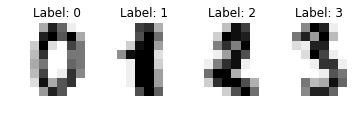

In [7]:
# Viewing some images and labels - Print pixels
images_e_labels = list(zip(digits.images,  # explanatory variable of object digits
                           digits.target)) # variable output of object digits - classes

for index, (image, label) in enumerate(images_e_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

In [5]:
# Generate X and Y
X = digits.data
Y = digits.target

In [6]:
# X and Y format
print(X.shape, Y.shape)

(1797, 64) (1797,)


#### KNN Classification in Python - Preprocessing and Normalization

In [7]:
# Splitting into training and test data
X_train, testData, Y_train, testLabels = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [8]:
# Splitting training data into training data and validation data
trainData, validData, trainLabels, validLabels = train_test_split(X_train, 
                                                                  Y_train, 
                                                                  test_size = 0.1, 
                                                                  random_state = 84)

In [10]:
# Printing the number of examples (notes) on each dataset

print("Training Examples: {}".format(len(trainLabels)))
print("Validation Examples: {}".format(len(validLabels)))
print("Test Examples: {}".format(len(testLabels)))

Training Examples: 1131
Validation Examples: 126
Test Examples: 540


In [11]:
# Normalization of data by Average

# Calculation of the average of the training dataset
X_norm = np.mean(X, axis = 0)

# Normalization of training and test data
X_train_norm = trainData - X_norm
X_valid_norm = validData - X_norm
X_test_norm = testData - X_norm

In [12]:
# format of datasets
print(X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

(1131, 64) (126, 64) (540, 64)


#### KNN Rating in Python - Testing the Best K Value



In [13]:
# Range of k values that we will test
kVals = range(1, 30, 2)

In [14]:
# Empty list to receive accuracy
accuracy = []

In [16]:
# Loop on all k values to test each of them

for k in kVals:
    
    # Loop on all k values to test each of them
    modelKNN = KNeighborsClassifier(n_neighbors = k)
    modelKNN.fit(trainData, trainLabels)
          
    # Evaluating the model and updating the list of accuracys
    score = modelKNN.score(validData, validLabels)
    print("With a value of k = %d, accuracy is = %.2f%%"% (k, score * 100))
    accuracy.append(score)

With a value of k = 1, accuracy is = 99.21%
With a value of k = 3, accuracy is = 100.00%
With a value of k = 5, accuracy is = 100.00%
With a value of k = 7, accuracy is = 99.21%
With a value of k = 9, accuracy is = 98.41%
With a value of k = 11, accuracy is = 98.41%
With a value of k = 13, accuracy is = 97.62%
With a value of k = 15, accuracy is = 97.62%
With a value of k = 17, accuracy is = 97.62%
With a value of k = 19, accuracy is = 97.62%
With a value of k = 21, accuracy is = 97.62%
With a value of k = 23, accuracy is = 97.62%
With a value of k = 25, accuracy is = 96.83%
With a value of k = 27, accuracy is = 96.83%
With a value of k = 29, accuracy is = 96.83%


In [17]:
# Getting the value of k that presented the highest accuracy
i = np.argmax(accuracy)
print("The value of k = %d reached the highest accuracy of %.2f%% in the validation data!" % (kVals[i], 
                                                                                             accuracy[i] * 100))

The value of k = 3 reached the highest accuracy of 100.00% in the validation data!


#### KNN Classification in Python - KNN Model Construction and Training

In [18]:
# Creating the final version of the model with the highest value of k
finalModel = KNeighborsClassifier(n_neighbors = kVals[i])

In [19]:
# Model training
finalModel.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=3)

#### KNN Classification in Python - Predictions with Model Test and Evaluation Data

In [20]:
# Predictions with test data
predictions = finalModel.predict(testData)

In [21]:
# Model performance in test data
print("Model Evaluation in Test Data")
print(classification_report(testLabels, predictions))

Model Evaluation in Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.95      0.98      0.96        55
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        54
           4       1.00      0.98      0.99        61
           5       0.98      1.00      0.99        59
           6       1.00      0.98      0.99        46
           7       1.00      1.00      1.00        56
           8       1.00      0.95      0.97        59
           9       0.96      1.00      0.98        48

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [22]:
# Confusion Matrix of the Final Model
print ("Confusion matrix")
print(confusion_matrix(testLabels, predictions))

Confusion matrix
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  1]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


I believe this digit is: 1


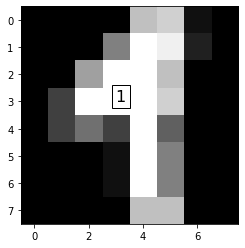

I believe this digit is: 7


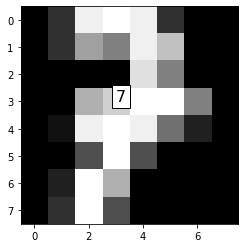

I believe this digit is: 4


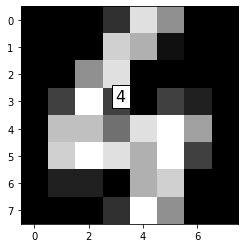

I believe this digit is: 4


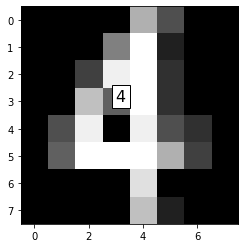

I believe this digit is: 5


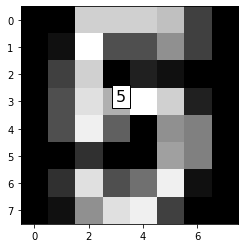

In [25]:
# Making predictions with the trained model using test data
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
         
    # Gets an image and makes the prediction
    image = testData[i]
    prediction = finalModel.predict([image])[0]
         
    # Show predictions
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels,cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
    print("I believe this digit is: {}".format(prediction))
    plt.show()

#### KNN Classification in Python - Predictions on New Data with the Trained Model

In [26]:
# Setting a new digit (input data)
newDigit = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

In [27]:
# Normalizing the new digit
newDigit_norm = newDigit - X_norm

In [28]:
# Making the prediction with the trained model
newPrediction = finalModel.predict([newDigit_norm])

I believe this digit is: [6]


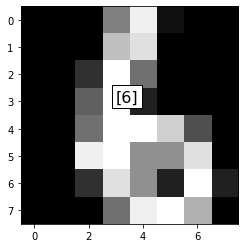

In [29]:
# Model prediction
imgdata = np.array(newDigit, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(newPrediction,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("I believe this digit is: {}".format(newPrediction))
plt.show()

In [31]:
# Setting a new digit (input data)
newDigit = [0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
              13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
              16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
              0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
              16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.]

In [32]:
# Normalizing the new digit
newDigit_norm = newDigit - X_norm

In [33]:
# Making the prediction with the trained model
newPrediction = finalModel.predict([newDigit_norm])

I believe this digit is: [1]


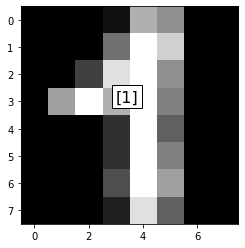

In [34]:
# Model prediction
imgdata = np.array(newDigit, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(newPrediction,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("I believe this digit is: {}".format(newPrediction))
plt.show()